# Use OSMnx to plot street network over place shape

Author: [Geoff Boeing](https://geoffboeing.com/)

This example uses Portland, Maine - a city with several islands within its municipal boundaries. Thus, we set `retain_all=True` when getting the network so that we keep all the graph components, not just the largest connected component.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon

%matplotlib inline
ox.config(use_cache=True, log_console=False)
ox.__version__

'1.1.2'

In [2]:
# get the place boundaries
place = "Portland, Maine"
gdf = ox.geocode_to_gdf(place)

# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph_from_place(place, network_type="drive", retain_all=True)

/Users/junhyun/.pyenv/versions/3.8.5/envs/openstreetmap/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/Users/junhyun/.pyenv/versions/3.8.5/envs/openstreetmap/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


/var/folders/d3/j8xh77fn6cddqhxzg5jmq0r00000gn/T/ipykernel_27678/2599074612.py:17: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/junhyun/.pyenv/versions/3.8.5/envs/openstreetmap/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


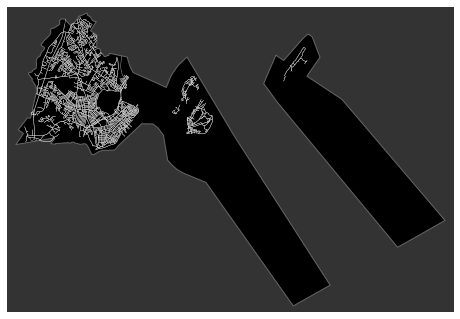

In [3]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in gdf["geometry"].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)
            ax.add_patch(patch)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

Notice this municipal boundary is an administrative boundary, not a physical boundary, so it represents jurisdictional bounds, not individual physical features like islands. To get individual islands' geometries, use the `geometries` module:

In [4]:
islands = ox.geometries_from_place(place, tags={"place": ["island", "islet"]})
islands.shape

/Users/junhyun/.pyenv/versions/3.8.5/envs/openstreetmap/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


(27, 21)